# Week 3 Data Exploration

### Load packages

In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import datetime as dt
import scipy as scp
from scipy import stats
from scipy.stats import ttest_ind

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

#### Additional Data Wrangling

In [2]:
### Import cleaned data without original STATUS column

merged4A = pd.read_csv('../Data/merged4Analysis30.csv')

In [3]:
merged4A.head(25)

,Unnamed: 0,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,eduLvl,famStatus,housingType,occupation,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
1,1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
2,2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
3,3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
4,4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
5,5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
6,6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
7,7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
8,8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
9,9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1


In [4]:
# drop duplicates to show one record per applicant for analysis
merged4B = merged4A.drop_duplicates(subset=merged4A.columns[1:], keep='first')

In [6]:
# sort dataFrame by ID so that each unique applicants' info appears together (check no dupes)
merged4C= merged4B.sort_values('ID')

<AxesSubplot:>

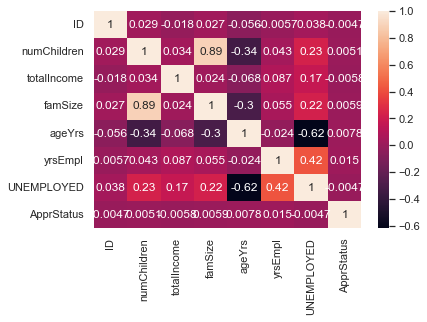

In [14]:
# Correlation matrix
sns.heatmap(merged4C.corr(), annot=True)

# family size and number of children are highly correlated, but the rest of the variables do not have significant correlation to eachother. Drop numChildren before doing any ML.

In [15]:
# save csv
merged4C.to_csv("../Data/mergedNoDupes.csv")

## Explore continuous variables

Text(0.5, 1.0, 'Applicant Income Distribution')

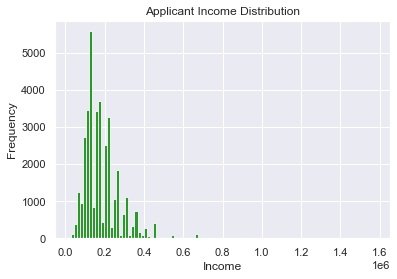

In [20]:
num_bins = 100
n, bins, patches = plt.hist(merged4C['totalIncome'], num_bins, facecolor='green', alpha = .8)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')

### There is a slight positive skew in income.  There must be some outliers.

In [21]:
merged4C.describe()

,Unnamed: 0,ID,numChildren,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
count,36457.000000,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.00000,36457.000000
mean,385325.247854,5.078227e+06,0.430315,1.866857e+05,2.198453,44.231368,6.024264,0.83172,0.996626
std,224634.062951,4.187524e+04,0.742367,1.017892e+05,0.911686,11.504127,6.480069,0.37412,0.057987
min,0.000000,5.008804e+06,0.000000,2.700000e+04,1.000000,21.000000,0.000000,0.00000,0.000000
25%,189102.000000,5.042028e+06,0.000000,1.215000e+05,2.000000,35.000000,1.117066,1.00000,1.000000
50%,389474.000000,5.074614e+06,0.000000,1.575000e+05,2.000000,43.000000,4.249232,1.00000,1.000000
75%,581410.000000,5.115396e+06,1.000000,2.250000e+05,3.000000,54.000000,8.632621,1.00000,1.000000
max,777701.000000,5.150487e+06,19.000000,1.575000e+06,20.000000,69.000000,43.020733,1.00000,1.000000


In [22]:
# print income range represented in this data set
minInc = merged4C.totalIncome.min()
print("The lowest applicant income is" , minInc)

The lowest applicant income is 27000.0


In [23]:
maxInc = merged4C.totalIncome.max()
print("The maximum applicant income is" , maxInc)

The maximum applicant income is 1575000.0


<AxesSubplot:>

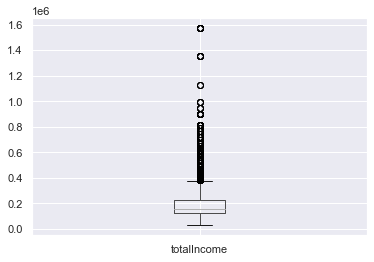

In [24]:
merged4C.boxplot('totalIncome')

<AxesSubplot:>

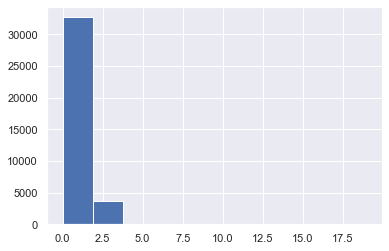

In [25]:
merged4C['numChildren'].hist()

<AxesSubplot:>

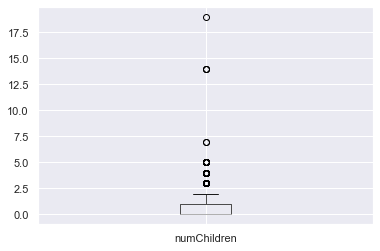

In [26]:
merged4C.boxplot('numChildren')

<AxesSubplot:>

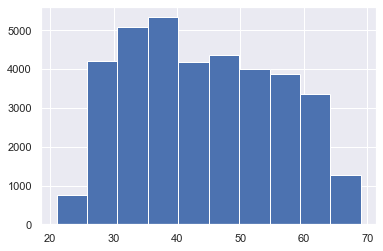

In [27]:
merged4C['ageYrs'].hist()

<AxesSubplot:>

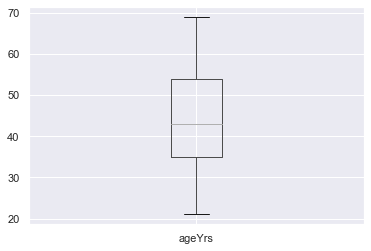

In [28]:
merged4C.boxplot('ageYrs')

<AxesSubplot:>

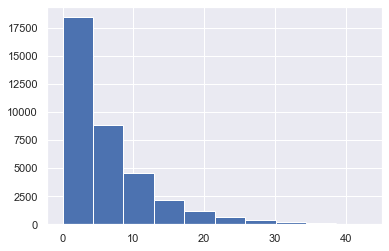

In [29]:
merged4C['yrsEmpl'].hist()

<AxesSubplot:>

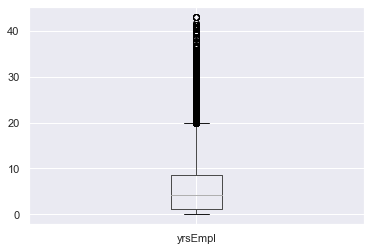

In [30]:
merged4C.boxplot('yrsEmpl')

<AxesSubplot:>

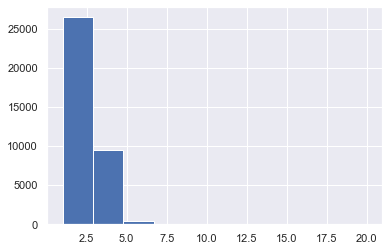

In [31]:
merged4C['famSize'].hist()

<AxesSubplot:>

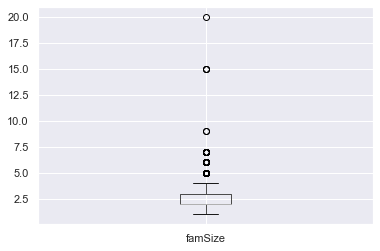

In [32]:
merged4C.boxplot('famSize')

## Categorical Variable Distributions

<AxesSubplot:>

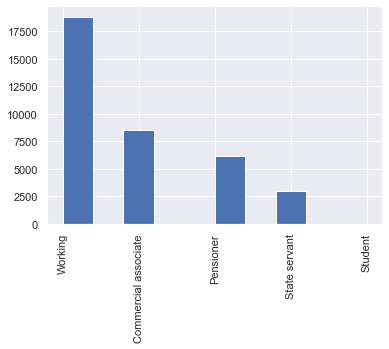

In [33]:
merged4C['incomeType'].hist(xrot=90)

<AxesSubplot:>

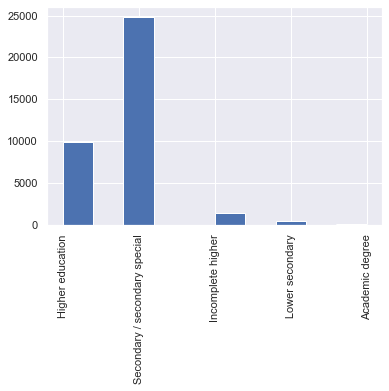

In [34]:
merged4C['eduLvl'].hist(xrot=90)

<AxesSubplot:>

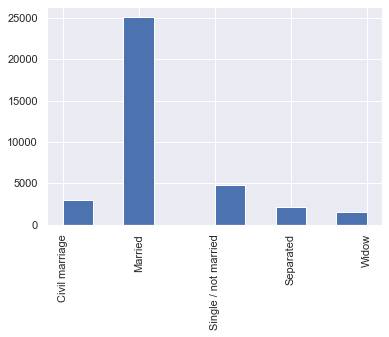

In [35]:
merged4C['famStatus'].hist(xrot=90)

In [38]:
merged4C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 171489
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   36457 non-null  int64  
 1   ID           36457 non-null  int64  
 2   gender       36457 non-null  object 
 3   ownsCar      36457 non-null  object 
 4   ownsRealty   36457 non-null  object 
 5   numChildren  36457 non-null  int64  
 6   totalIncome  36457 non-null  float64
 7   incomeType   36457 non-null  object 
 8   eduLvl       36457 non-null  object 
 9   famStatus    36457 non-null  object 
 10  housingType  36457 non-null  object 
 11  famSize      36457 non-null  float64
 12  ageYrs       36457 non-null  float64
 13  yrsEmpl      36457 non-null  float64
 14  UNEMPLOYED   36457 non-null  int64  
 15  ApprStatus   36457 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 4.7+ MB


In [40]:
merged4E.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 171489
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           36457 non-null  int64  
 1   gender       36457 non-null  object 
 2   ownsCar      36457 non-null  object 
 3   ownsRealty   36457 non-null  object 
 4   numChildren  36457 non-null  int64  
 5   totalIncome  36457 non-null  float64
 6   incomeType   36457 non-null  object 
 7   eduLvl       36457 non-null  object 
 8   famStatus    36457 non-null  object 
 9   housingType  36457 non-null  object 
 10  famSize      36457 non-null  float64
 11  ageYrs       36457 non-null  float64
 12  yrsEmpl      36457 non-null  float64
 13  UNEMPLOYED   36457 non-null  int64  
 14  ApprStatus   36457 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 4.5+ MB


## Explore Binary Categorical Variables

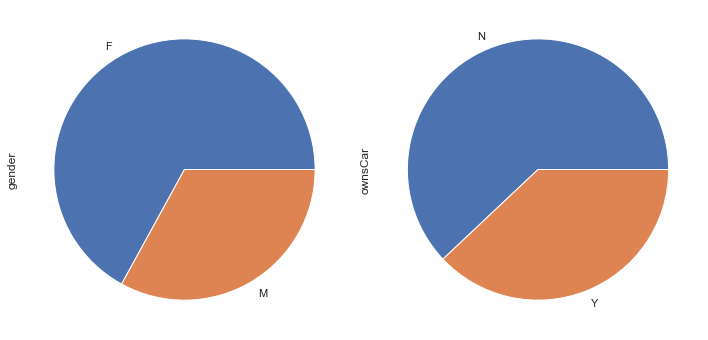

In [43]:
# gender, ownsCar dist
fig, axes = plt.subplots(1,2)
g1 = merged4E.groupby('gender')['gender'].count().plot(kind='pie', y='gender', ax=axes[0])
g2 = merged4E.groupby('ownsCar')['ownsCar'].count().plot(kind='pie', y='ownsCar', ax=axes[1])

fig.set_size_inches(10,5)

plt.tight_layout()

In [44]:
# need to balance the M/F variable. Undersample on the F.

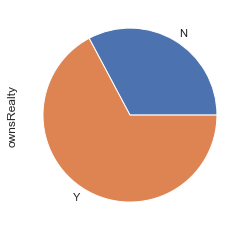

In [45]:
# ownsRealty 

g3 = merged4E.groupby('ownsRealty')['ownsRealty'].count().plot(kind='pie', y='ownsRealty')

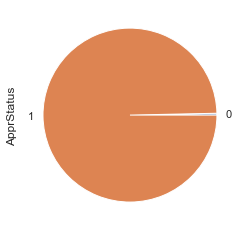

In [46]:
g4 = merged4E.groupby('ApprStatus')['ApprStatus'].count().plot(kind='pie', y='ApprovalStatus')

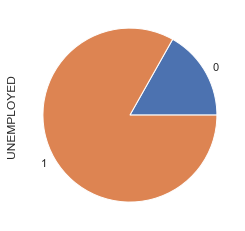

In [47]:
g5 = merged4E.groupby('UNEMPLOYED')['UNEMPLOYED'].count().plot(kind='pie', y='UNEMPLOYED')

In [48]:
merged4E.ApprStatus.value_counts()

1    36334
0      123
Name: ApprStatus, dtype: int64

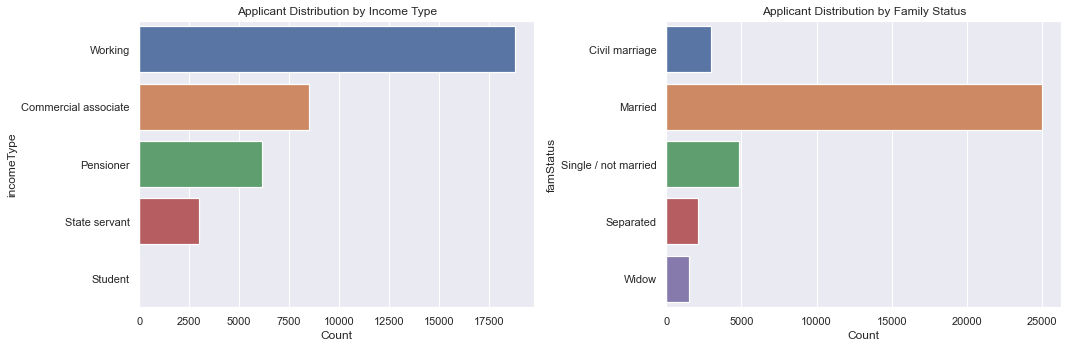

In [49]:
# Income type, family status distributions

fig, axes = plt.subplots(1,2)

incTDist=sns.countplot(y=merged4E.incomeType,linewidth=1.2, ax=axes[0])
incTDist.set_title("Applicant Distribution by Income Type")
incTDist.set_xlabel("Count")

famDist=sns.countplot(y=merged4E.famStatus,linewidth=1.2, ax=axes[1])
famDist.set_title("Applicant Distribution by Family Status")
famDist.set_xlabel("Count")

fig.set_size_inches(15,5)

plt.tight_layout()

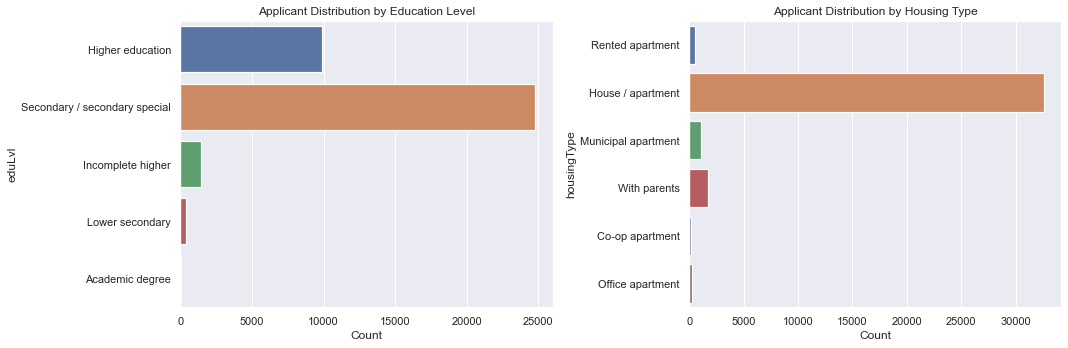

In [50]:
# education type, housing type

fig, axes = plt.subplots(1,2)

eduTDist=sns.countplot(y=merged4E.eduLvl,linewidth=1.2, ax=axes[0])
eduTDist.set_title("Applicant Distribution by Education Level")
eduTDist.set_xlabel("Count")

houDist=sns.countplot(y=merged4E.housingType,linewidth=1.2, ax=axes[1])
houDist.set_title("Applicant Distribution by Housing Type")
houDist.set_xlabel("Count")

fig.set_size_inches(15,5)

plt.tight_layout()

### Our benchmark to compare our ML model to is that 99.6% of applicants in this dataset would be approved for a credit card, and 0.40% would be considered too risky, and thus rejected.

In [16]:
recordsExplore = pd.read_csv('../Data/credit_record.csv')

In [17]:
recordsExplore.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [19]:
# show the frequency of each Status type for every ID
recordsEx2 = pd.DataFrame(recordsExplore.groupby(["ID", "STATUS"])["STATUS"].count()).rename(columns={'STATUS': 'Freq'}).reset_index()
recordsEx2

,ID,STATUS,Freq
0,5001711,0,3
1,5001711,X,1
2,5001712,0,10
3,5001712,C,9
4,5001713,X,22
...,...,...,...
94138,5150483,X,18
94139,5150484,0,12
94140,5150484,C,1
94141,5150485,0,2


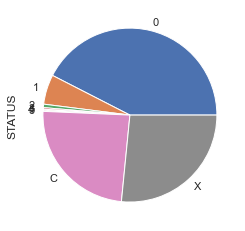

In [22]:
# plot status types
g8 = recordsEx2.groupby('STATUS')['STATUS'].count().plot(kind='pie', y='STATUS')


#### The majority of the applicants are paid up to date, have a 0 balance, or are overdue on payment by 1-29 days.